Bank Marketing Campaign

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display


In [ ]:
import psycopg2
import pandas as pd
from config import config

import warnings
warnings.filterwarnings('ignore')

def connect():
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # read connection parameters
        params = config()

        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params)
		
        # create a cursor
        cur = conn.cursor()
        
	# execute a statement
        print('PostgreSQL database version:')
        cur.execute('SELECT version()')

        # display the PostgreSQL database server version
        db_version = cur.fetchone()
        print(db_version)
       
    # select all 
        df = pd.read_sql('SELECT * FROM customer',conn)
        # print(df.head())
        return df
        
	# close the communication with the PostgreSQL
        cur.close()
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
            print('Database connection closed.')
    

if __name__ == '__main__':
    connect()
    
    

df = connect()



In [ ]:
# quick overview 
display(df.shape)
display(df.head(10))
display(df.info())
display(df.describe())

In [ ]:
# check for duplicates and missing data 
display(df.duplicated().sum())
display(df.isnull().sum())


In [ ]:
# marital status, education, default status

display(df.marital_status.value_counts(normalize=True)*100)
display(df.education.value_counts(normalize=True)*100)
display(df.default_status.value_counts(normalize=True)*100)

Text(0.5, 1.0, 'Distribution of Customer Age')

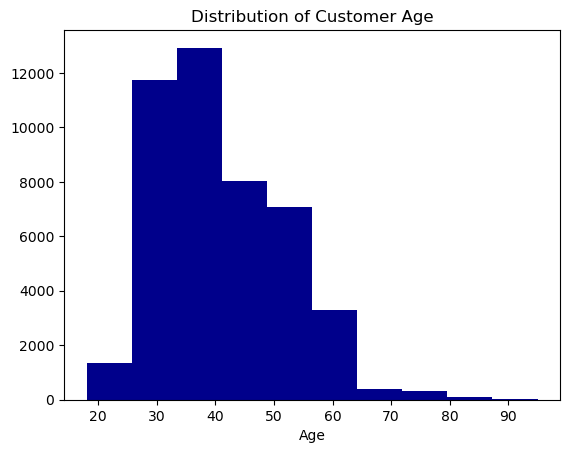

In [55]:
# age

plt.hist(x=df['age'], bins=10, color='darkblue')
plt.xlabel("Age")
plt.title("Distribution of Customer Age")

In [ ]:
# default status and age 

sns.catplot(x="default_status", y="age", data=df, kind="box", aspect=2)
plt.xlabel("Status")
plt.ylabel("")
plt.title("Boxplot for Default Status vs Age")